# Экзогенные переменные

## Импорт модулей

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)

## Данные

In [16]:
mtuk = pd.read_excel("data/mean_temperature_UK.xlsx", index_col="Date", parse_dates=True)

In [17]:
uk = pd.read_csv("data/UnitedKingdom.csv", index_col="Date", parse_dates=True)

In [33]:
uk

,Gas consumption,UGS storage,LNG send out
Date,,,
2014-01-01,NaN,0.178547,612.923160
2014-01-02,NaN,0.188001,609.684587
2014-01-03,NaN,0.193733,606.439351
2014-01-04,NaN,0.193733,603.194115
2014-01-05,NaN,0.189011,599.962206
...,...,...,...
2020-12-27,254.908453,1.454552,515.132932
2020-12-28,329.111672,1.407907,590.799578
2020-12-29,328.514920,1.372570,550.150829


In [36]:
mtuk = mtuk.loc[(mtuk.index > "2013-12-31") & (mtuk.index < "2021-01-01")]

In [47]:
data = pd.concat([uk[["UGS storage"]], mtuk], axis=1)

In [48]:
data.head()

,UGS storage,GB
Date,,
2014-01-01,0.178547,7.06
2014-01-02,0.188001,7.46
2014-01-03,0.193733,7.55
2014-01-04,0.193733,5.52
2014-01-05,0.189011,5.86


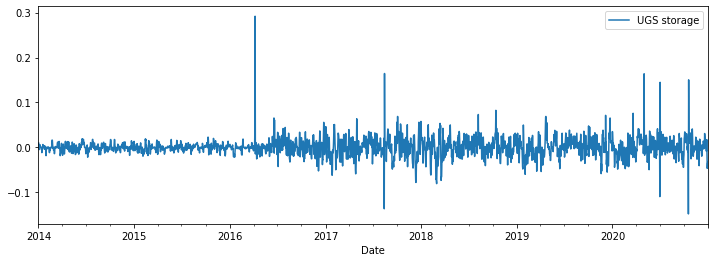

In [51]:
data[["UGS storage"]].diff(1).plot(figsize=(12,4))
plt.show()

## Убираем выбросы

In [96]:
quantile_up = np.percentile(data["UGS storage"], 99, interpolation="midpoint")
quantile_low = np.percentile(data["UGS storage"], 1, interpolation="midpoint")

In [97]:
data.loc[(data["UGS storage"] > quantile_up) | (data["UGS storage"] < quantile_low)]

,UGS storage,GB
Date,,
2014-06-05,0.012990,12.63
2015-05-05,0.013524,10.53
2015-05-06,0.012193,9.45
2015-05-07,0.010862,8.61
2015-05-08,0.009930,9.44
2015-05-09,0.011892,10.59
2015-05-10,0.014739,12.20
2015-05-11,0.014175,13.36
2015-05-12,0.014175,11.17


In [98]:
data.loc[(data.index > "2013-12-31") & (data.index < "2014-06-11")]

,UGS storage,GB
Date,,
2014-01-01,0.178547,7.06
2014-01-02,0.188001,7.46
2014-01-03,0.193733,7.55
2014-01-04,0.193733,5.52
2014-01-05,0.189011,5.86
...,...,...
2014-06-06,0.021365,14.93
2014-06-07,0.023988,15.18
2014-06-08,0.026029,15.81
